In [1]:
#import required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df1=pd.read_csv('beer_sampleSubmission.csv')
df1.head()

,Id,Style
0,0,American IPA
1,1,American IPA
2,2,American IPA
3,3,American IPA
4,4,American IPA


In [3]:
# inspect data
df1.shape

(10314, 2)

In [4]:
# read data
df2=pd.read_csv('beer_train.csv')
df2.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,Specific Gravity,All Grain,NaN,20.0,American IPA
1,1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,Specific Gravity,extract,0.50,20.0,American IPA
2,2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,20.0,Irish Red Ale
3,3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,Specific Gravity,All Grain,NaN,NaN,American Stout
4,4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,Specific Gravity,extract,0.75,20.0,American IPA


In [5]:
df2.shape

(24066, 17)

In [6]:
# read data
df3=pd.read_csv('beer_test.csv')
df3.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,0,20.82,15.6465,4.23184,6.21,55.13,8.20,28.01,90,11.800,70.0,1.3,Plato,All Grain,1.00,25.56
1,1,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,2,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
3,3,10.00,1.0520,1.01000,5.51,93.58,5.46,28.50,60,1.018,75.0,1.5,Specific Gravity,All Grain,0.50,17.00
4,4,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00


In [7]:
df3.shape

(10314, 16)

In [8]:
# concatenate two datasets
new_beer_test=pd.concat([df1,df3],axis=1)
new_beer_test.head()

,Id,Style,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,0,American IPA,0,20.82,15.6465,4.23184,6.21,55.13,8.20,28.01,90,11.800,70.0,1.3,Plato,All Grain,1.00,25.56
1,1,American IPA,1,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,2,American IPA,2,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
3,3,American IPA,3,10.00,1.0520,1.01000,5.51,93.58,5.46,28.50,60,1.018,75.0,1.5,Specific Gravity,All Grain,0.50,17.00
4,4,American IPA,4,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00


In [9]:
new_beer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10314 non-null  int64  
 1   Style          10314 non-null  object 
 2   Id             10314 non-null  int64  
 3   Size(L)        10314 non-null  float64
 4   OG             10314 non-null  float64
 5   FG             10314 non-null  float64
 6   ABV            10314 non-null  float64
 7   IBU            10314 non-null  float64
 8   Color          10314 non-null  float64
 9   BoilSize       10314 non-null  float64
 10  BoilTime       10314 non-null  int64  
 11  BoilGravity    9982 non-null   float64
 12  Efficiency     10314 non-null  float64
 13  MashThickness  6148 non-null   float64
 14  SugarScale     10314 non-null  object 
 15  BrewMethod     10314 non-null  object 
 16  PitchRate      4663 non-null   float64
 17  PrimaryTemp    7143 non-null   float64
dtypes: flo

In [10]:
new_beer_test.isnull().sum()

Id                  0
Style               0
Id                  0
Size(L)             0
OG                  0
FG                  0
ABV                 0
IBU                 0
Color               0
BoilSize            0
BoilTime            0
BoilGravity       332
Efficiency          0
MashThickness    4166
SugarScale          0
BrewMethod          0
PitchRate        5651
PrimaryTemp      3171
dtype: int64

### Segregating Null and Non Null values

In [11]:
x_train_1=new_beer_test.dropna()
x_train_1.shape

(2726, 18)

In [12]:
x_train_1.head()

,Id,Style,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,0,American IPA,0,20.82,15.6465,4.23184,6.21,55.13,8.20,28.01,90,11.800,70.0,1.30,Plato,All Grain,1.00,25.56
3,3,American IPA,3,10.00,1.0520,1.01000,5.51,93.58,5.46,28.50,60,1.018,75.0,1.50,Specific Gravity,All Grain,0.50,17.00
5,5,American IPA,5,18.93,1.0670,1.01100,7.29,45.88,8.06,24.61,60,1.051,75.0,1.50,Specific Gravity,All Grain,1.25,21.11
13,13,American IPA,13,20.82,1.0740,1.02400,6.53,39.17,38.00,26.50,60,1.058,65.0,1.50,Specific Gravity,All Grain,0.75,18.33
20,20,American IPA,20,39.75,1.0560,1.01000,6.00,46.97,5.94,53.94,60,1.041,70.0,1.33,Specific Gravity,All Grain,0.50,20.00


In [13]:
x_train_1.drop('Id',axis=1,inplace=True)

In [14]:
x_train_2=new_beer_test[new_beer_test.isnull().any(axis=1)]
x_train_2.shape

(7588, 18)

In [15]:
x_train_2.head()

,Id,Style,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
1,1,American IPA,1,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,2,American IPA,2,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
4,4,American IPA,4,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00
6,6,American IPA,6,20.82,1.0620,1.01200,6.48,45.90,4.06,28.39,90,1.045,76.0,1.5,Specific Gravity,All Grain,NaN,18.33
7,7,American IPA,7,68.14,1.0700,1.01600,7.05,55.36,7.33,68.14,10,1.070,75.0,1.5,Specific Gravity,All Grain,NaN,NaN


In [16]:
x_train_2.drop('Id',axis=1,inplace=True)

In [17]:
x_train_2.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
1,American IPA,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,American IPA,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
4,American IPA,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00
6,American IPA,20.82,1.0620,1.01200,6.48,45.90,4.06,28.39,90,1.045,76.0,1.5,Specific Gravity,All Grain,NaN,18.33
7,American IPA,68.14,1.0700,1.01600,7.05,55.36,7.33,68.14,10,1.070,75.0,1.5,Specific Gravity,All Grain,NaN,NaN


In [18]:
x_train_2.isnull().sum()

Style               0
Size(L)             0
OG                  0
FG                  0
ABV                 0
IBU                 0
Color               0
BoilSize            0
BoilTime            0
BoilGravity       332
Efficiency          0
MashThickness    4166
SugarScale          0
BrewMethod          0
PitchRate        5651
PrimaryTemp      3171
dtype: int64

In [19]:
x_train_3=df2.dropna()
x_train_3.shape

(6373, 17)

In [20]:
x_train_3.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
6,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,70.0,2.00,Specific Gravity,All Grain,0.35,26.67,Saison
7,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,65.0,5.00,Specific Gravity,All Grain,1.00,19.00,American Pale Ale
9,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,70.0,1.25,Specific Gravity,All Grain,0.75,17.78,American IPA
14,14,58.67,1.059,1.011,6.32,43.17,6.48,71.92,65,1.048,62.0,1.50,Specific Gravity,All Grain,1.00,23.89,Saison
15,15,20.82,1.069,1.014,7.20,104.21,8.78,28.39,60,1.050,60.0,1.50,Specific Gravity,All Grain,1.25,19.44,American IPA


In [21]:
x_train_3.drop('Id',axis=1,inplace=True)

In [22]:
x_train_4=df2[df2.isnull().any(axis=1)]
x_train_4.shape

(17693, 17)

In [23]:
x_train_4.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,Specific Gravity,All Grain,NaN,20.0,American IPA
1,1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,Specific Gravity,extract,0.50,20.0,American IPA
2,2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,20.0,Irish Red Ale
3,3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,Specific Gravity,All Grain,NaN,NaN,American Stout
4,4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,Specific Gravity,extract,0.75,20.0,American IPA


In [24]:
x_train_4.drop('Id',axis=1,inplace=True)

In [25]:
x_train_4.head()

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,Specific Gravity,All Grain,NaN,20.0,American IPA
1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,Specific Gravity,extract,0.50,20.0,American IPA
2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,20.0,Irish Red Ale
3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,Specific Gravity,All Grain,NaN,NaN,American Stout
4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,Specific Gravity,extract,0.75,20.0,American IPA


In [26]:
new_beer_train=x_train_1.append(x_train_3)
new_beer_train.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,20.82,15.6465,4.23184,6.21,55.13,8.20,28.01,90,11.800,70.0,1.30,Plato,All Grain,1.00,25.56
3,American IPA,10.00,1.0520,1.01000,5.51,93.58,5.46,28.50,60,1.018,75.0,1.50,Specific Gravity,All Grain,0.50,17.00
5,American IPA,18.93,1.0670,1.01100,7.29,45.88,8.06,24.61,60,1.051,75.0,1.50,Specific Gravity,All Grain,1.25,21.11
13,American IPA,20.82,1.0740,1.02400,6.53,39.17,38.00,26.50,60,1.058,65.0,1.50,Specific Gravity,All Grain,0.75,18.33
20,American IPA,39.75,1.0560,1.01000,6.00,46.97,5.94,53.94,60,1.041,70.0,1.33,Specific Gravity,All Grain,0.50,20.00


In [27]:
new_beer_train.shape

(9099, 16)

In [28]:
new_beer_train.isnull().sum()

Style            0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

In [29]:
new_beer_test_1=x_train_2.append(x_train_4)
new_beer_test_1.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
1,American IPA,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,American IPA,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
4,American IPA,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00
6,American IPA,20.82,1.0620,1.01200,6.48,45.90,4.06,28.39,90,1.045,76.0,1.5,Specific Gravity,All Grain,NaN,18.33
7,American IPA,68.14,1.0700,1.01600,7.05,55.36,7.33,68.14,10,1.070,75.0,1.5,Specific Gravity,All Grain,NaN,NaN


In [30]:
new_beer_test_1.shape

(25281, 16)

### EDA on Dataset

<AxesSubplot:xlabel='Style'>

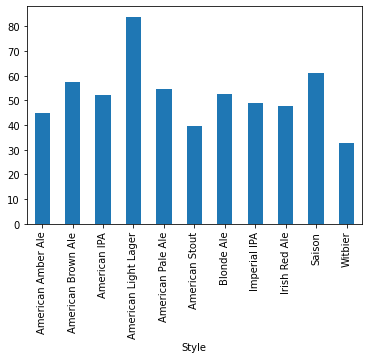

In [31]:
new_beer_train.groupby('Style')['Size(L)'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

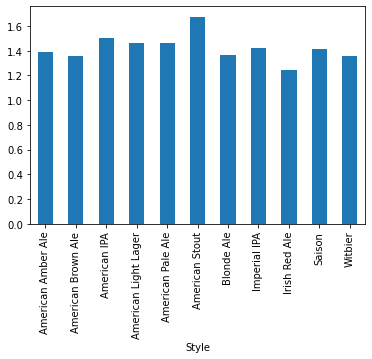

In [32]:
new_beer_train.groupby('Style')['OG'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

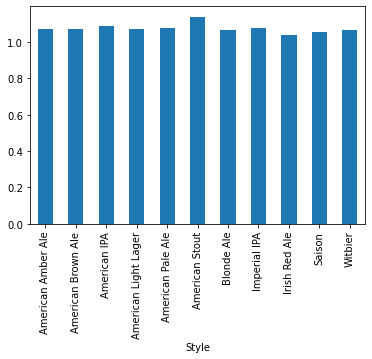

In [33]:
new_beer_train.groupby('Style')['FG'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

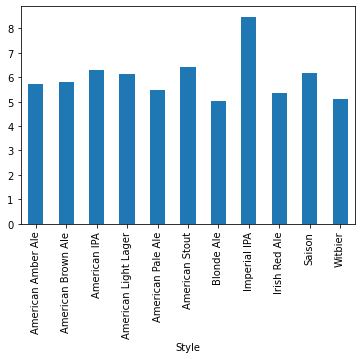

In [34]:
new_beer_train.groupby('Style')['ABV'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

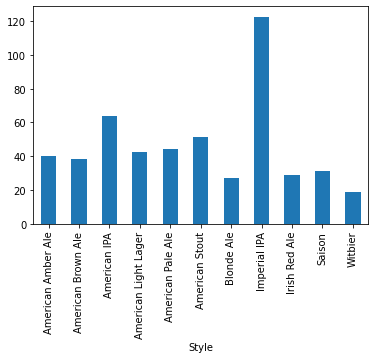

In [35]:
new_beer_train.groupby('Style')['IBU'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

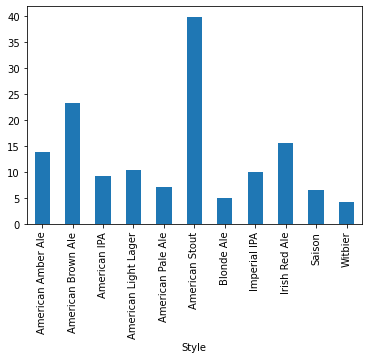

In [36]:
new_beer_train.groupby('Style')['Color'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

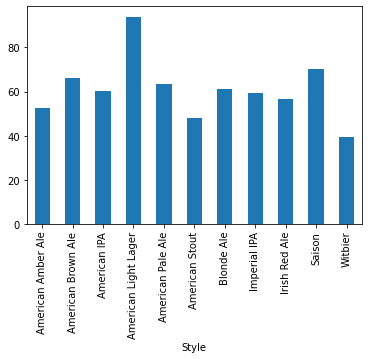

In [37]:
new_beer_train.groupby('Style')['BoilSize'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

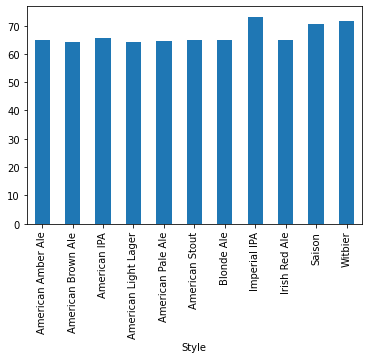

In [38]:
new_beer_train.groupby('Style')['BoilTime'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

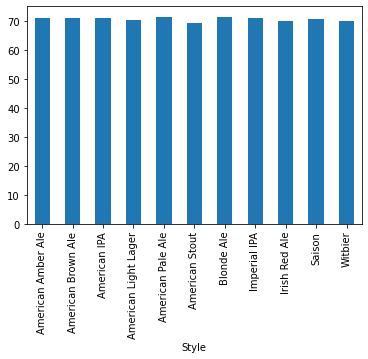

In [39]:
new_beer_train.groupby('Style')['Efficiency'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

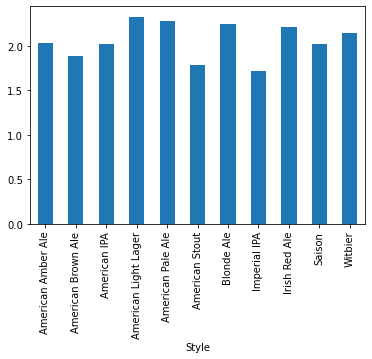

In [40]:
new_beer_train.groupby('Style')['MashThickness'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

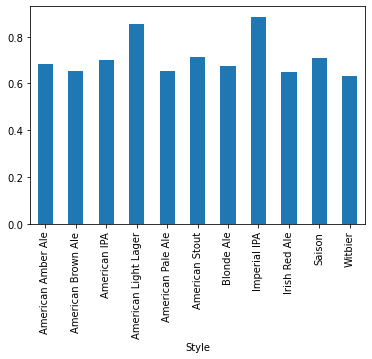

In [41]:
new_beer_train.groupby('Style')['PitchRate'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

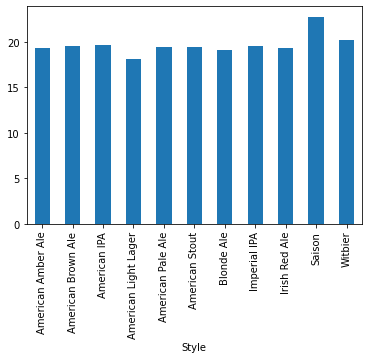

In [42]:
new_beer_train.groupby('Style')['PrimaryTemp'].mean().plot.bar()

In [43]:
new_beer_test_1.isnull().sum()

Style                0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       1268
Efficiency           0
MashThickness    14032
SugarScale           0
BrewMethod           0
PitchRate        18785
PrimaryTemp      10659
dtype: int64

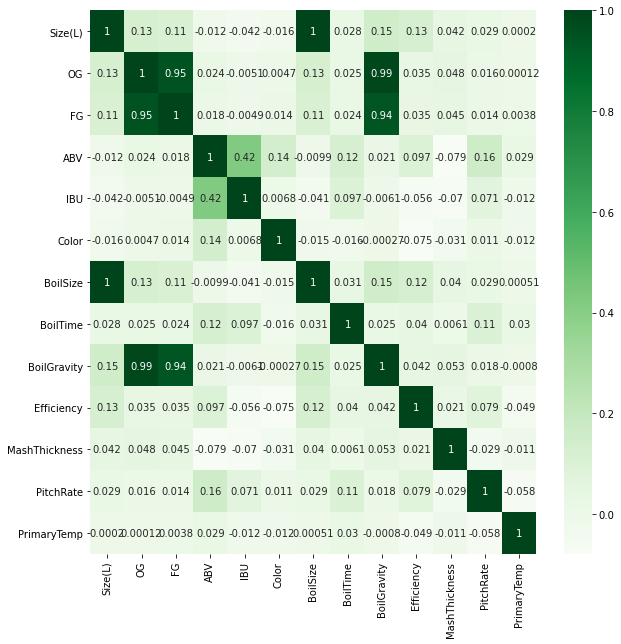

In [44]:
plt.figure(figsize=[10,10])
sns.heatmap(new_beer_train.corr(),annot=True,cmap='Greens')
plt.show()

In [45]:
new_beer_train=new_beer_train.drop(['BoilSize','OG','FG'],axis=1)
new_beer_train.head()

,Style,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,20.82,6.21,55.13,8.20,90,11.800,70.0,1.30,Plato,All Grain,1.00,25.56
3,American IPA,10.00,5.51,93.58,5.46,60,1.018,75.0,1.50,Specific Gravity,All Grain,0.50,17.00
5,American IPA,18.93,7.29,45.88,8.06,60,1.051,75.0,1.50,Specific Gravity,All Grain,1.25,21.11
13,American IPA,20.82,6.53,39.17,38.00,60,1.058,65.0,1.50,Specific Gravity,All Grain,0.75,18.33
20,American IPA,39.75,6.00,46.97,5.94,60,1.041,70.0,1.33,Specific Gravity,All Grain,0.50,20.00


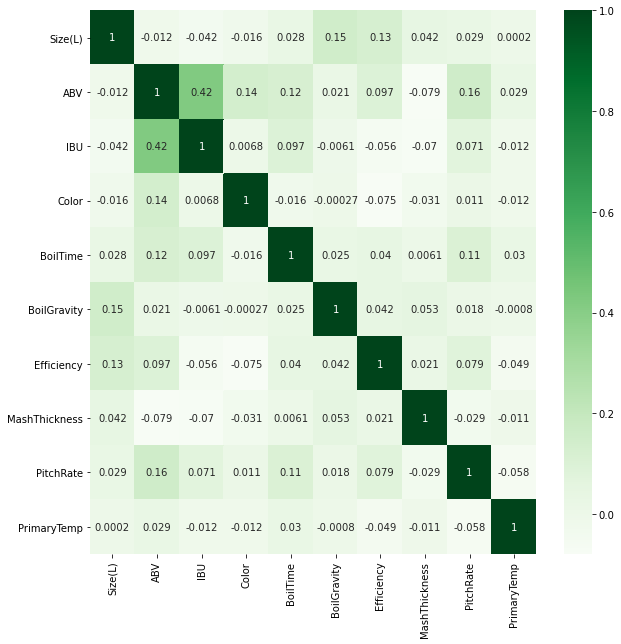

In [46]:
plt.figure(figsize=[10,10])
sns.heatmap(new_beer_train.corr(),annot=True,cmap='Greens')
plt.show()

### Converting Categorical Values to Numerical Values

In [47]:
status3 = pd.get_dummies(new_beer_train['Style'], drop_first = True)
new_beer_train = pd.concat([new_beer_train, status3], axis = 1)
new_beer_train.head()

,Style,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,American IPA,20.82,6.21,55.13,8.20,90,11.800,70.0,1.30,Plato,...,0,1,0,0,0,0,0,0,0,0
3,American IPA,10.00,5.51,93.58,5.46,60,1.018,75.0,1.50,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
5,American IPA,18.93,7.29,45.88,8.06,60,1.051,75.0,1.50,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
13,American IPA,20.82,6.53,39.17,38.00,60,1.058,65.0,1.50,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
20,American IPA,39.75,6.00,46.97,5.94,60,1.041,70.0,1.33,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0


In [48]:
new_beer_train=new_beer_train.drop(['Style'],axis=1)
new_beer_train.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,20.82,6.21,55.13,8.20,90,11.800,70.0,1.30,Plato,All Grain,...,0,1,0,0,0,0,0,0,0,0
3,10.00,5.51,93.58,5.46,60,1.018,75.0,1.50,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
5,18.93,7.29,45.88,8.06,60,1.051,75.0,1.50,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
13,20.82,6.53,39.17,38.00,60,1.058,65.0,1.50,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
20,39.75,6.00,46.97,5.94,60,1.041,70.0,1.33,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0


In [49]:
new_beer_train['SugarScale'].value_counts()
new_beer_train['SugarScale']=new_beer_train['SugarScale'].replace('Specific Gravity',0)
new_beer_train['SugarScale']=new_beer_train['SugarScale'].replace('Plato',1)

In [50]:
new_beer_train.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,20.82,6.21,55.13,8.20,90,11.800,70.0,1.30,1,All Grain,...,0,1,0,0,0,0,0,0,0,0
3,10.00,5.51,93.58,5.46,60,1.018,75.0,1.50,0,All Grain,...,0,1,0,0,0,0,0,0,0,0
5,18.93,7.29,45.88,8.06,60,1.051,75.0,1.50,0,All Grain,...,0,1,0,0,0,0,0,0,0,0
13,20.82,6.53,39.17,38.00,60,1.058,65.0,1.50,0,All Grain,...,0,1,0,0,0,0,0,0,0,0
20,39.75,6.00,46.97,5.94,60,1.041,70.0,1.33,0,All Grain,...,0,1,0,0,0,0,0,0,0,0


In [51]:
new_beer_train['BrewMethod'].value_counts()
new_beer_train['BrewMethod']=new_beer_train['BrewMethod'].replace('All Grain',1)

In [52]:
new_beer_train.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,20.82,6.21,55.13,8.20,90,11.800,70.0,1.30,1,1,...,0,1,0,0,0,0,0,0,0,0
3,10.00,5.51,93.58,5.46,60,1.018,75.0,1.50,0,1,...,0,1,0,0,0,0,0,0,0,0
5,18.93,7.29,45.88,8.06,60,1.051,75.0,1.50,0,1,...,0,1,0,0,0,0,0,0,0,0
13,20.82,6.53,39.17,38.00,60,1.058,65.0,1.50,0,1,...,0,1,0,0,0,0,0,0,0,0
20,39.75,6.00,46.97,5.94,60,1.041,70.0,1.33,0,1,...,0,1,0,0,0,0,0,0,0,0


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
num_vars=['Size(L)', 'ABV', 'IBU','Color','BoilTime','BoilGravity','Efficiency','MashThickness']
new_beer_train[num_vars]=scaler.fit_transform(new_beer_train[num_vars])
new_beer_train.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,0.003237,0.124299,0.082079,0.163498,0.500000,0.556701,0.697581,0.0260,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.001387,0.110288,0.139324,0.108665,0.333333,0.000928,0.747984,0.0300,0,1,...,0,1,0,0,0,0,0,0,0,0
5,0.002914,0.145917,0.068307,0.160696,0.333333,0.002629,0.747984,0.0300,0,1,...,0,1,0,0,0,0,0,0,0,0
13,0.003237,0.130705,0.058317,0.759856,0.333333,0.002990,0.647177,0.0300,0,1,...,0,1,0,0,0,0,0,0,0,0
20,0.006474,0.120096,0.069930,0.118271,0.333333,0.002113,0.697581,0.0266,0,1,...,0,1,0,0,0,0,0,0,0,0


In [55]:
y_train = new_beer_train.pop('PrimaryTemp')
X_train = new_beer_train


### Recursive Feature Elimination

In [56]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Size(L)', True, 1),
 ('ABV', True, 1),
 ('IBU', False, 7),
 ('Color', False, 5),
 ('BoilTime', False, 2),
 ('BoilGravity', True, 1),
 ('Efficiency', True, 1),
 ('MashThickness', True, 1),
 ('SugarScale', True, 1),
 ('BrewMethod', False, 12),
 ('PitchRate', True, 1),
 ('American Brown Ale', False, 10),
 ('American IPA', False, 6),
 ('American Light Lager', True, 1),
 ('American Pale Ale', False, 8),
 ('American Stout', False, 4),
 ('Blonde Ale', False, 3),
 ('Imperial IPA', False, 9),
 ('Irish Red Ale', False, 11),
 ('Saison', True, 1),
 ('Witbier', True, 1)]

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['Size(L)', 'ABV', 'BoilGravity', 'Efficiency', 'MashThickness',
       'SugarScale', 'PitchRate', 'American Light Lager', 'Saison', 'Witbier'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['IBU', 'Color', 'BoilTime', 'BrewMethod', 'American Brown Ale',
       'American IPA', 'American Pale Ale', 'American Stout', 'Blonde Ale',
       'Imperial IPA', 'Irish Red Ale'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [63]:
### Linear Regression using OLS

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
# Running a linear regression model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [66]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            PrimaryTemp   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     55.76
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          6.31e-110
Time:                        15:03:57   Log-Likelihood:                -24320.
No. Observations:                9099   AIC:                         4.866e+04
Df Residuals:                    9088   BIC:                         4.874e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.8484 

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,104.04
3,BoilGravity,22.36
6,SugarScale,22.23
2,ABV,1.07
1,Size(L),1.05
7,PitchRate,1.04
4,Efficiency,1.03
10,Witbier,1.02
5,MashThickness,1.01
8,American Light Lager,1.01


In [68]:
X_train_new = X_train_rfe.drop(["SugarScale"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            PrimaryTemp   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     61.92
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          8.96e-111
Time:                        15:04:34   Log-Likelihood:                -24320.
No. Observations:                9099   AIC:                         4.866e+04
Df Residuals:                    9089   BIC:                         4.873e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.8639 

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Acceptable Model with all features significant and VIF value less than 5

,Features,VIF
0,const,103.42
2,ABV,1.05
1,Size(L),1.04
6,PitchRate,1.04
3,BoilGravity,1.03
4,Efficiency,1.03
9,Witbier,1.02
5,MashThickness,1.01
7,American Light Lager,1.01
8,Saison,1.00


In [70]:
X_train_new1 = X_train_new.drop(["BoilGravity"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            PrimaryTemp   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     69.67
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.06e-111
Time:                        15:04:57   Log-Likelihood:                -24320.
No. Observations:                9099   AIC:                         4.866e+04
Df Residuals:                    9090   BIC:                         4.872e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.8624 

In [72]:
X_train_new2 = X_train_new1.drop(["MashThickness"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            PrimaryTemp   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     79.58
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.36e-112
Time:                        15:06:01   Log-Likelihood:                -24321.
No. Observations:                9099   AIC:                         4.866e+04
Df Residuals:                    9091   BIC:                         4.871e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.8317 

In [73]:
X_train_new3 = X_train_new2.drop(["Size(L)"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            PrimaryTemp   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     92.75
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.79e-113
Time:                        15:06:47   Log-Likelihood:                -24321.
No. Observations:                9099   AIC:                         4.866e+04
Df Residuals:                    9092   BIC:                         4.871e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.8085 

In [74]:
y_train_cnt = lm.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

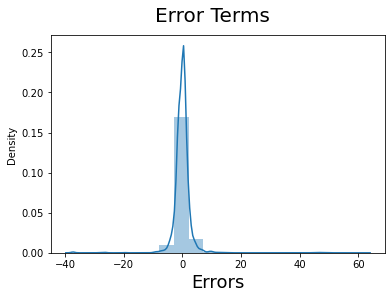

In [75]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     